In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
train = pd.read_csv('../Train/train_set_geo_1_per_mortar_stone.csv')

train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,geo_level_1_per_mud_mortar_stone,geo_level_1_sum_per_mud_mortar_stone,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,1,24381,270,37,6,24381,3
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,1,19080,199,16,8,19080,2
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,1,14889,1760,136,21,14889,3
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,0,1,6252,205,31,22,6252,2
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,1,8220,1038,122,0,0,3


In [4]:
X, y = train.iloc[:,:-1], train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [7]:
params = {
    'n_estimators': [20, 50, 70],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [4, 15, 30],
    'random_state': [123],
    'class_weight': ["balanced"]
}

In [14]:
opt = GridSearchCV(RandomForestClassifier(), params, cv=10, n_jobs=2, return_train_score=True, scoring='f1_micro')
opt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [4, 15, 30],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [20, 50, 70], 'random_state': [123]},
             return_train_score=True, scoring='f1_micro')

In [15]:
opt.best_estimator_

RandomForestClassifier(class_weight='balanced', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=70, random_state=123)

In [16]:
preds = opt.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F1 Score", f1)

F1 Score 0.7092590460841871


In [18]:
rf_model = RandomForestClassifier(class_weight='balanced', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=70, random_state=123)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F1 Score", f1)

F1 Score 0.7092590460841871


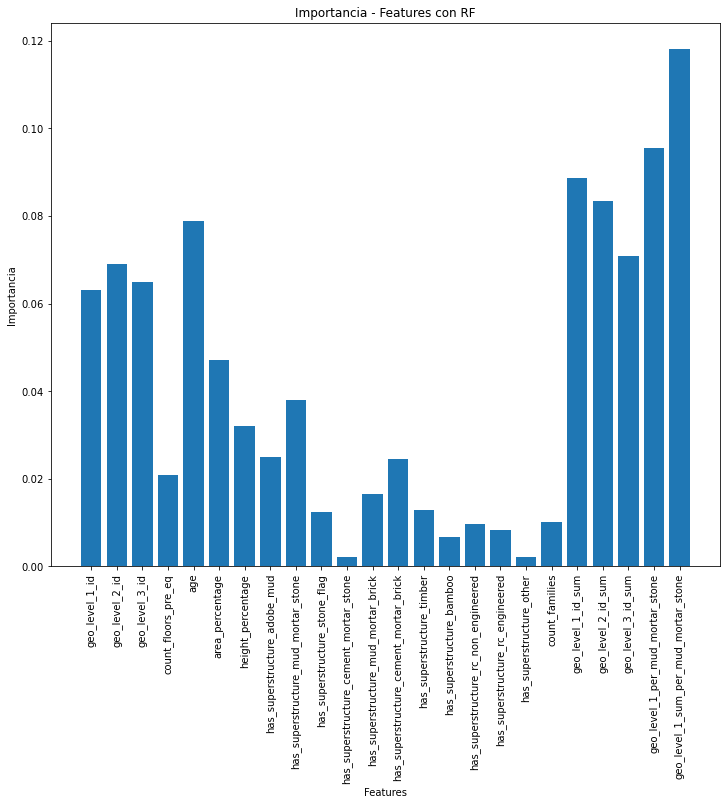

In [19]:
plt.figure(figsize=(12, 10))
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()

## Test

In [20]:
test = pd.read_csv('../Test/test_set_geo_1_per_mortar_stone.csv')

test.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,geo_level_1_per_mud_mortar_stone,geo_level_1_sum_per_mud_mortar_stone
0,300051,17,596,11307,3,20,7,6,0,1,...,0,0,0,0,1,7452,45,4,17,7452
1,99355,6,141,11987,2,25,13,5,0,1,...,0,0,0,0,1,8104,65,3,6,8104
2,890251,22,19,10044,2,5,4,5,0,1,...,0,0,0,0,1,2106,17,4,22,2106
3,745817,26,39,633,1,0,19,3,0,0,...,0,0,0,0,2,7387,1329,190,0,0
4,421793,17,289,7970,3,15,8,7,0,1,...,0,0,0,0,1,7452,62,7,17,7452


In [21]:
ids = test['building_id']

test.drop('building_id', axis='columns', inplace=True)

test.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,geo_level_1_per_mud_mortar_stone,geo_level_1_sum_per_mud_mortar_stone
0,17,596,11307,3,20,7,6,0,1,0,...,0,0,0,0,1,7452,45,4,17,7452
1,6,141,11987,2,25,13,5,0,1,0,...,0,0,0,0,1,8104,65,3,6,8104
2,22,19,10044,2,5,4,5,0,1,0,...,0,0,0,0,1,2106,17,4,22,2106
3,26,39,633,1,0,19,3,0,0,0,...,0,0,0,0,2,7387,1329,190,0,0
4,17,289,7970,3,15,8,7,0,1,0,...,0,0,0,0,1,7452,62,7,17,7452


In [22]:
preds = rf_model.predict(test)

In [23]:
test['damage_grade'] = preds
test['building_id'] = ids

result = test[['building_id', 'damage_grade']]

result.head()

,building_id,damage_grade
0,300051,2
1,99355,2
2,890251,2
3,745817,1
4,421793,3


In [24]:
result.to_csv('../preds_rf_v7.csv', index=False)